In [52]:
import pandas as pd
import numpy as np
from sklearn.svm import SVR
import matplotlib.pyplot as plt

In [53]:
def fix_dates(x):
    # comes in as day-monthstr-yr
    # I want yearmonthday
    x = x.replace('Jan','01')
    x = x.replace('Feb','02')
    x = x.replace('Mar','03')
    x = x.replace('Apr','04')
    x = x.replace('May','05')
    x = x.replace('Jun','06')
    x = x.replace('Jul','07')
    x = x.replace('Aug','08')
    x = x.replace('Sep','09')
    x = x.replace('Oct','10')
    x = x.replace('Nov','11')
    x = x.replace('Dec','12')
    # lets split it
    splt = x.split('-')
    ret = splt[2] + splt[1]
    # but lets make sure that the day gets a 0 if its one index
    if len(splt[0]) == 1:
        ret += "0" + splt[0]
    else:
        ret += splt[0]
    return int(ret)
    

df = pd.read_csv("./aapl.csv",
                 converters={'Date': lambda x: fix_dates(x)})

print(df.head(n=5))

     Date    Open    High     Low   Close    Volume
0  170609  155.19  155.19  146.02  148.98  64882657
1  170608  155.25  155.54  154.40  154.99  21250798
2  170607  155.02  155.98  154.48  155.37  21069647
3  170606  153.90  155.81  153.78  154.45  26624926
4  170605  154.34  154.45  153.46  153.93  25331662


In [54]:
col_names = df.columns.values.tolist()
print(col_names)

['Date', 'Open', 'High', 'Low', 'Close', 'Volume']


In [55]:
print(df.dtypes)

Date        int64
Open      float64
High      float64
Low       float64
Close     float64
Volume      int64
dtype: object


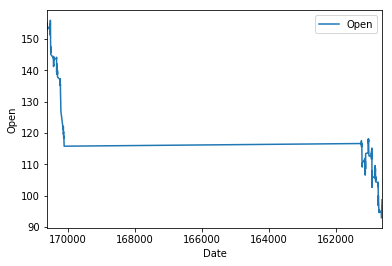

In [68]:
draw = df[[col_names[0], col_names[1]]]
draw.plot(x='Date', y='Open')
plt.xlabel('Date')
plt.ylabel('Open')
plt.figure()
plt.show()

In [69]:
def predict(dates, prices, x):
    dates = np.reshape(dates, (len(dates),1))
    svr_rbf = SVR(kernel='rbf', C=1e3, gamma=0.1)
    svr_rbf.fit(dates, prices)
    # graph it
    plt.scatter(dates,prices,color='black',label='Data')
    plt.plot(dates, svr_rbf.predict(dates), color='blue', label='RBF model')
    plt.xlabel("Date")
    plt.ylabel("Price")
    plt.title("SVR-RBF")
    plt.legend()
    plt.show()
    
    return svr_rbf.predict(x)[0]

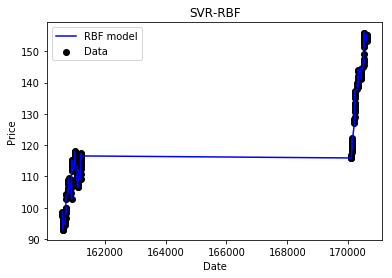

121.673059889


In [71]:
pred_price = predict(df['Date'].values, df['Open'].values, 15)
print(pred_price)